# Resistivity Data Analysis

In [355]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import glob
import os

In [356]:
def url(path):
    # normalized spacing
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/resistivitylab/norm'+path
    path = path.replace(" ", "%20")
    return path
def url2(path):
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/resistivitylab'+path
    path = path.replace(" ", "%20")
    return path
def gone(arr):
    for i in range(1,len(arr)):
        if np.abs(arr[i]-arr[i-1]) > 0.5*arr[i]:
            try:
                arr[i] = (arr[i-1] + arr[i+1])/2
            except IndexError:
                arr[i] = arr[i-1]
    return(arr)
rI = 0.9867e-6
sI = 0.300
to = 300

trial1 = np.loadtxt(url("/1011_RXC.txt")) 
trial2 = np.loadtxt(url("/1013_RXC.txt")) 
trial3 = np.loadtxt(url("/1013_RXCa.txt")) 
trial4 = np.loadtxt(url("/1016_RXC.txt")) 
trial5 = np.loadtxt(url("/1016_RXCb.txt")) 
super1 = np.loadtxt(url("/1017_RXC_super1.txt")) 
super2 = np.loadtxt(url("/1017_RXC_super2.txt")) 
super3 = np.loadtxt(url("/1017_RXC_super3.txt")) 
dspecs = np.flip(pd.read_csv(url2("/Si_Diode_Specs_New.csv"), header=None).to_numpy().T, axis=1) 
sspecs = pd.read_csv(url2("/Superconductor_Specs.csv"), header=None).to_numpy().T
ttype = pd.read_csv(url2("/Ttype.csv"), header=0).to_numpy().T

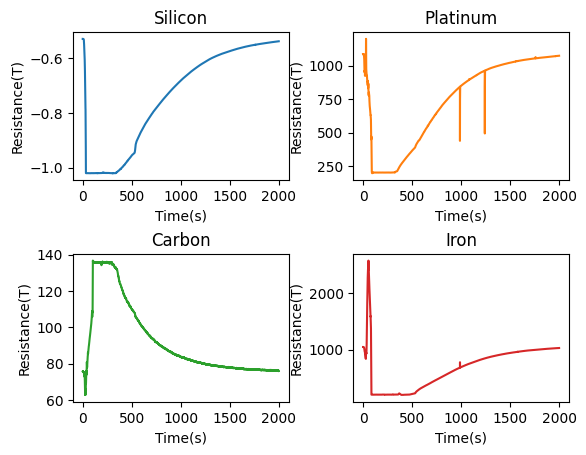

In [357]:
trial = trial4

x = np.arange(0,len(trial[0])*0.4,0.4)
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(wspace=0.3,hspace=0.5)
axs[0, 0].plot(x, -gone(trial[0]))
axs[0, 0].set_title('Silicon')
axs[0, 1].plot(x, -gone(trial[1])/rI, 'tab:orange')
axs[0, 1].set_title('Platinum')
axs[1, 0].plot(x, -gone(trial[2])/rI, 'tab:green')
axs[1, 0].set_title('Carbon')
axs[1, 1].plot(x, gone(trial[3])/rI, 'tab:red')
axs[1, 1].set_title('Iron')

for ax in axs.flat:
    ax.set(xlabel='Time(s)', ylabel='Resistance(T)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

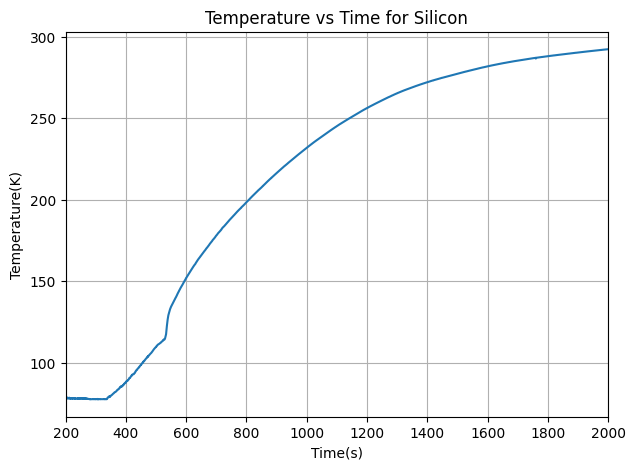

In [360]:
#dspecs[0] temp
#dspecs[1] voltage
#dspecs[2] ignore
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
plt.plot(x[to:], tconvert(gone(trial[0][to:])))
#ax.plot(80, .693*rat,marker="o")
#x.plot(100, .1,28*rat,marker="o")
# set the basic properties
ax.set_ylabel('Temperature(K)')
ax.set_xlabel('Time(s)')
ax.set_title('Temperature vs Time for Silicon')

# set the limits
#ax.set_ylim(90, 290)
ax.set_xlim(200, 2000)

# set the grid on
ax.grid('on')
tconvert = InterpolatedUnivariateSpline(dspecs[1],dspecs[0])
#plt.plot(x[to:], tconvert(gone(trial[0][to:])))
plt.show()
temp = tconvert(gone(trial[0][to:]))

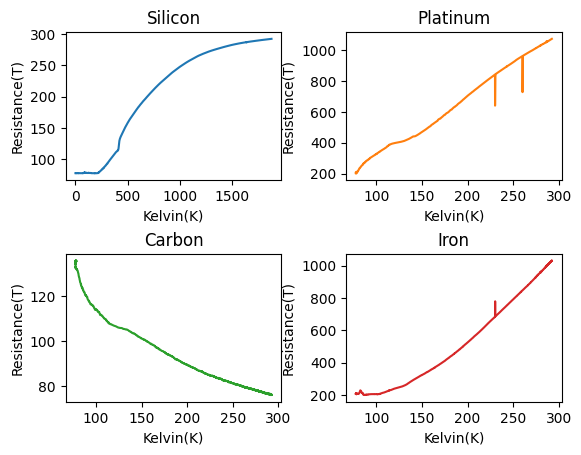

In [353]:

x = np.arange(0,len(trial[0][to:])*0.4,0.4)
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(wspace=0.3,hspace=0.5)
axs[0, 0].plot(x, tconvert(gone(trial[0][to:])))
axs[0, 0].set_title('Silicon')
axs[0, 1].plot(temp, -gone(trial[1][to:])/rI, 'tab:orange')
axs[0, 1].set_title('Platinum')
axs[1, 0].plot(temp, -gone(trial[2][to:])/rI, 'tab:green')
axs[1, 0].set_title('Carbon')
axs[1, 1].plot(temp, gone(trial[3][to:])/rI, 'tab:red')
axs[1, 1].set_title('Iron')

for ax in axs.flat:
    ax.set(xlabel='Kelvin(K)', ylabel='Resistance(T)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [317]:
#Fe Debye
l = 2172
iron1 = gone(trial[3][to:])[0:l]
iron2 = gone(trial[3][to:])[l+1:]
iron = np.concatenate((iron1,iron2))
def lin(x, m, b):
    return m*x + b
p, C = curve_fit(lin, (temp[0:-1])[880:1000], iron[880:1000]/rI, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err = sigp[0]
p2, C2 = curve_fit(lin, (temp[0:-1])[200:300], iron[200:300]/rI, absolute_sigma=True)
sigp2 = np.sqrt(np.diag(C))
m2 = p[0]
b2 = p[1]
err2 = sigp[0]
print(p, p2)

[1.95061929 5.16508304] [  3.83276713 -91.97937276]


6623.7363696234415


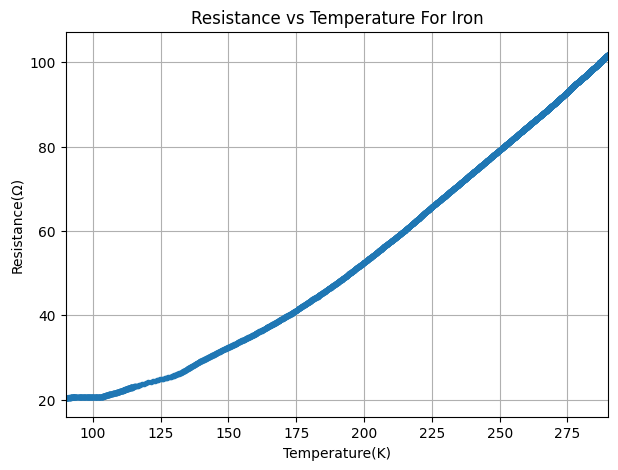

In [318]:
l = 0.020955
a = np.pi*(0.0010035)**2
rat = l/a 
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp[0:-1], iron/(10*rI), ".")
#ax.plot(80, .693*rat,marker="o")
#x.plot(100, .1,28*rat,marker="o")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Iron')

# set the limits
ax.set_xlim(90, 290)
#ax.set_ylim(200, 1100)

# set the grid on
ax.grid('on')
print(rat)

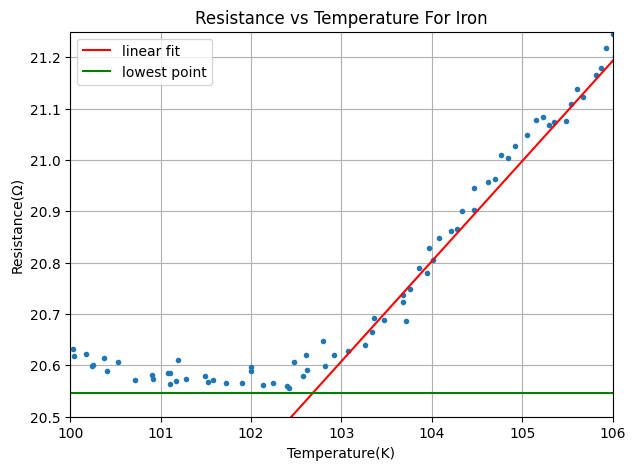

In [319]:
#x = np.arange()
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp[0:-1], 0.1*iron/rI, ".")
ax.plot(temp[0:-1], 0.1*lin(temp[0:-1], m, b), "r", label= "linear fit")
ax.axhline(20.547, color ="green", label = "lowest point")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Iron')

# set the limits
ax.set_xlim(100, 106)
ax.set_ylim(20.5, 21.25)

# set the grid on
ax.grid('on')
plt.legend()
#print(temp[0:-1][np.where(lin(temp[0:-1], m, b)>204.57)][0])

In [320]:
#Pt Debye

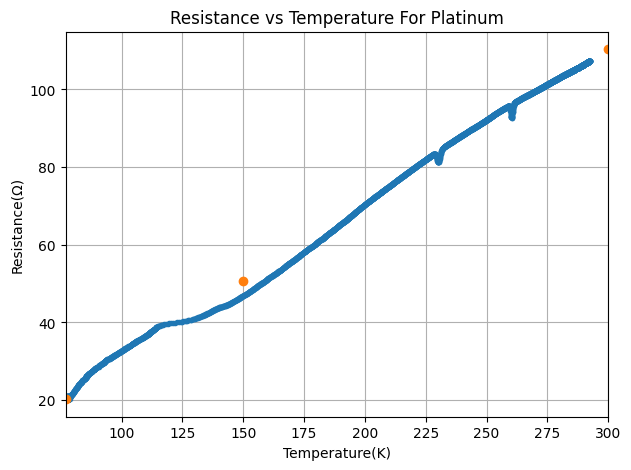

In [321]:
arr1 = [77,150,300]
arr2 = [20.38,50.788,110.354]

plat = gone(trial[1][to:])
fplat = gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(gone(
            plat)))))))))))))))))))))))))))))))))))))))))))))))))))))))))/rI
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp, -fplat/10, ".")
ax.plot(arr1, arr2,marker="o", ls="")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Platinum')

# set the limits
ax.set_xlim(77, 300)
#ax.set_ylim(6, 24)

# set the grid on
ax.grid('on')



28.263999999999385
-3.3051957094903592
77.6791092271479
202.2056115410662
0.0036726038618705454


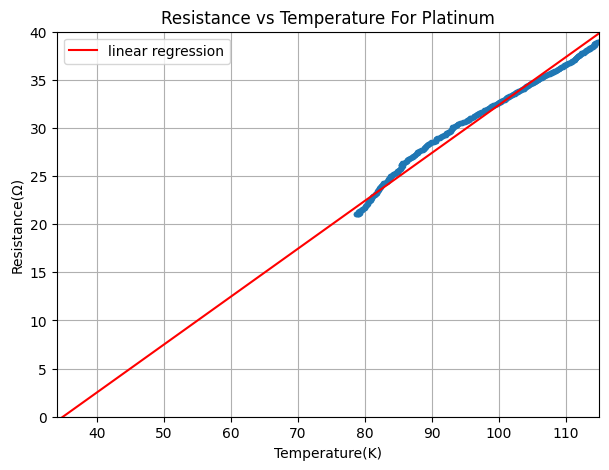

In [322]:
p, C = curve_fit(lin, (temp)[450:1000], -0.1*fplat[450:1000], absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err = sigp[0]
x = np.arange(28, 150, 0.0001)
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp[550:], -0.1*fplat[550:], ".")
ax.plot(x, lin(x, m, b), "r", label = "linear regression")
ax.axvline(0)
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Platinum')

# set the limits
ax.set_xlim(34, 115)
ax.set_ylim(0, 40)

# set the grid on
ax.grid('on')
plt.legend()
t = 2640
print(x[t])
print(lin(x, m, b)[t])
print(temp[400:][0])
print(-fplat[400:][0])
print(err)

In [323]:
#Band Gap

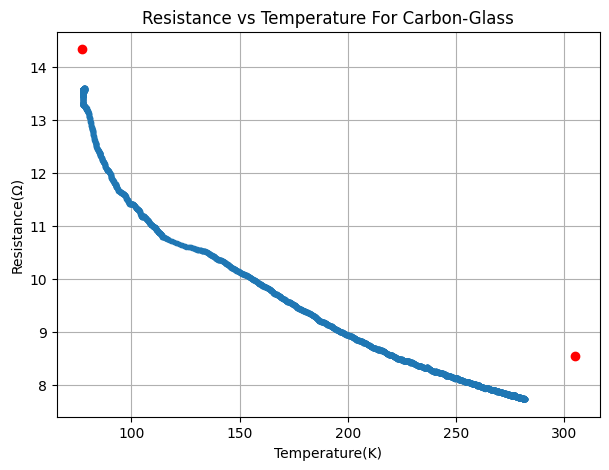

In [338]:
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(temp[:-1000], -0.1*gone(trial[2][to:-1000])/rI, ".")
ax.plot(77, 14.33,marker="o", color = "red", ls="")
ax.plot(305, 8.55,marker="o", color = "red", ls="")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Carbon-Glass')

# set the limits
#ax.set_xlim(80, 290)
#ax.set_ylim(75,135)

# set the grid on
ax.grid('on')


In [340]:
#find ln(rho)
def gapmodel(T, E, C):
    k = scipy.constants.physical_constants["Boltzmann constant in eV/K"][0]
    return E/(k*T)+C


In [341]:
A = np.pi*(3.048e-3/2)**2
L = 8.509e-3
k = scipy.constants.physical_constants["Boltzmann constant in eV/K"][0]

p, C = curve_fit(gapmodel, temp[:-1000], np.log((L*-0.1*gone(trial[2][to:-1000]/rI))/A))
sigp = np.sqrt(np.diag(C))
E = p[0]
#C = sigp[0]
C = p[1]
print(E*k*10**10)
print(sigp[0]*k*10**10)

4243.448821380632
9.547696180356839


In [327]:

p2, C2 = curve_fit(lin, gapmodel(temp, E, C), np.log((L*-gone(trial4[2][to:]/rI))/A))
sigp2 = np.sqrt(np.diag(C2))
m = p[0]
#C = sigp[0]
b = p[1]

11.972731620384637
9.673074291050133


8.976600370879483e-05

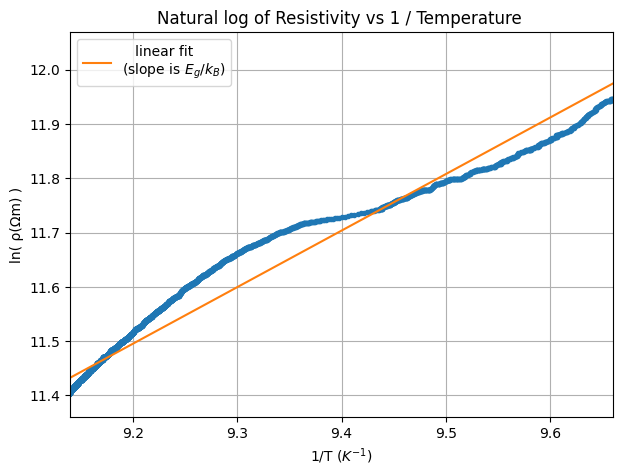

In [339]:
x = np.arange(11.4,12,0.01)
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(gapmodel(temp, E, C), np.log((L*-gone(trial[2][to:]/rI))/A), ".")
ax.plot(x-2.27, 1.0416912167553911*x-0.453, "-", label = "   linear fit \n(slope is $E_g/k_B$)")
# set the basic properties
ax.set_ylabel("ln( ρ(Ωm) )")
ax.set_xlabel('1/T ($K^{-1}$)')
ax.set_title('Natural log of Resistivity vs 1 / Temperature ')

# set the limits
ax.set_xlim(9.14,9.66)
#ax.set_ylim(11.45, 12)

# set the grid on
ax.grid('on')
plt.legend(loc="upper left")
print(np.log((L*-gone(trial4[2][to:]/rI))/A)[0])
print(gapmodel(temp, E, C)[0])
(11.392594872408749-11.972731620384637)/(11.423244816628975-11.980162969191372)
1.0416912167553911*k

In [308]:
## Super Conductor
to = 70
#plt.plot(super1[1][to:], super1[0][to:])

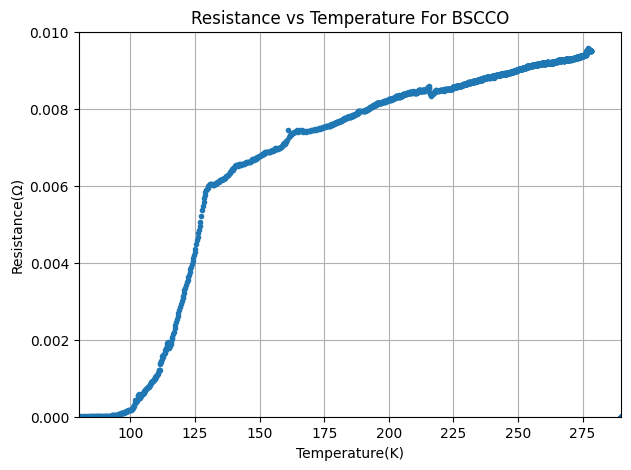

In [309]:
ttypespl = InterpolatedUnivariateSpline(-ttype[1]*10**-3, ttype[0])

# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(ttypespl(super3[1][to:]), super3[0][to:]/sI,".")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For BSCCO')

# set the limits
ax.set_xlim(80, 290)
ax.set_ylim(0, 0.01)

# set the grid on
ax.grid('on')

99.65500000098444
7.06036456426043e-07
0.02671264008819492


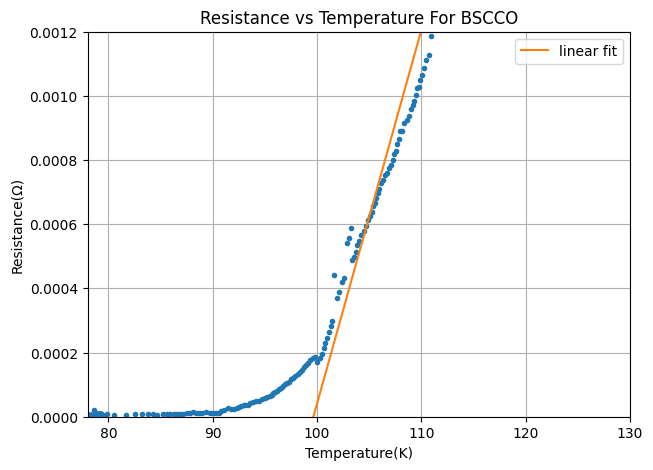

In [310]:
x = np.arange(70, 120, 0.0001)
t = 280
l = 200
p, C = curve_fit(lin, ttypespl(super3[1][to:])[l:t], (super3[0][to:]/sI)[l:t], absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err = sigp[0]

# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(ttypespl(super3[1][to:]), super3[0][to:]/sI,".")
ax.plot(x, lin(x, m, b), label = "linear fit")
#ax.axhline(np.mean(points), color="green")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For BSCCO')

# set the limits
ax.set_xlim(78, 130)
ax.set_ylim(0, 0.0012)

# set the grid on
ax.grid('on')
plt.legend()
t = 296550
print(x[t])
print(lin(x, m, b)[t])
print(err)

(1.8345401246739527e-05, 4.0134797062358714e-05)

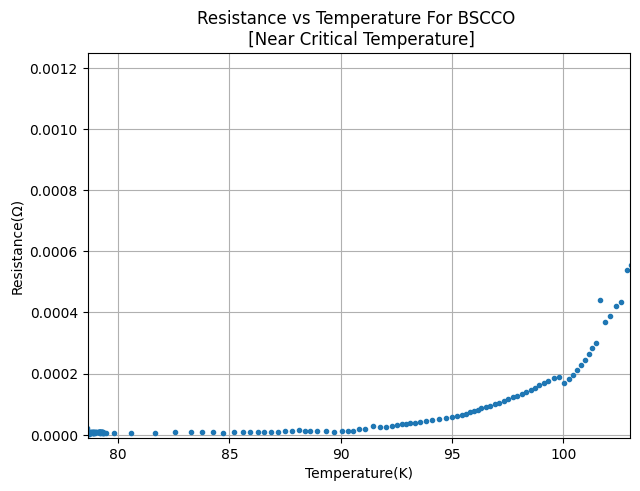

In [36]:
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(ttypespl(super3[1][to:]), super3[0][to:]/sI,".")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For BSCCO \n [Near Critical Temperature]')

# set the limits
ax.set_xlim(78.63,103)
ax.set_ylim(-1e-5,1.25e-3)

# set the grid on
ax.grid('on')

points = (super1[0][to:]/sI)[np.where(ttypespl(super1[1][to:])<99.66)]
np.mean(points), np.std(points)